In [1]:
import sys
import xarray as xr
import matplotlib.pyplot as plt
import datetime as dt

sys.path.insert(1,'../lib/')
import pyrnet

In [2]:
def read_pyrnet(date, campaign):
    pyr = pyrnet.read_hdcp2(date, campaign=campaign)
    x,y = pyrnet.get_xy_coords(pyr.lon,pyr.lat)
    pyr['x'] = xr.DataArray(x,dims=('nstations'))
    pyr['y'] = xr.DataArray(y,dims=('nstations'))
    return pyr

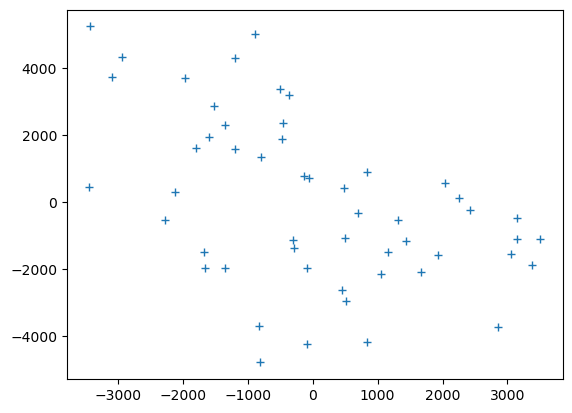

In [3]:
# read pyranometer data
date = dt.datetime(2013,7,15)
pyr  = read_pyrnet(date, 'hope_juelich')

tstart = int(10.5*3600)
tstop  = tstart+2*3600

tslice = slice(tstart,tstop)
plt.plot(pyr.x.data,pyr.y.data,'+')